In [32]:
import pandas as pd 
# from arcgis.features import FeatureLayer

In [33]:
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/FoodServiceData/FeatureServer/0'

# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []
# # ​Create the feature layer object
# feature_layer = FeatureLayer(url)

# while True:
#     # Query the feature layer with pagination
#     query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
#     # Retrieve the features from the query result
#     features = query_result.features
    
#     # Process the data for the current batch
#     for feature in features:
#         data_list.append(feature.attributes)
    
#     # Break the loop if the response is empty or the desired number of records is reached
#     if len(features) == 0 or len(data_list) >= 1000:
#         break
    
#     # Increment the offset by the batch size
#     offset += batch_size
# # Create a DataFrame from the data list
# df = pd.DataFrame(data_list)

Adove API call is working. I will use the CSV file so I dont keep pulling from the api while working on below logic. 

In [34]:
df = pd.read_csv("local_working.csv")

Drops cols we don't need. 

In [35]:
cols_drop = ['EstablishmentID', 'InspectionID', 'PlaceName', 'Address2', 'TypeDescription', 'NameSearch', 'Intersection']
df.drop(cols_drop, axis=1, inplace=True)

In [36]:
# df.head(2)

In [37]:
# df.shape

In [38]:
df['InspectionDate'] = pd.to_datetime(df['InspectionDate'])
df.head(2)

,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,InspectionDate,score,Grade,ObjectId
0,REGULAR,MI SUENO RESTAURANT,3425 BARDSTOWN RD,LOUISVILLE,KY,40218,2023-04-18,70,C,4803
1,REGULAR,DAISUKI SUSHI,1604 BARDSTOWN RD,LOUISVILLE,KY,40205,2023-04-14,71,C,10803


In [39]:
# df = df[(df['score'] != 0)]
# df = df.sort_values(by='score', ascending=True)
# # df = df.reset_index()
# df

In [40]:
# sorting inspection dates
df.sort_values('InspectionDate', ascending=False, inplace=True)
# dropping duplicate rest based on its first occurrence
df.drop_duplicates(subset='EstablishmentName', keep='first', inplace=True)

In [41]:
# testing the dups dropped
# est_counts = df['EstablishmentName'].value_counts()
# est_counts.plot()

In [42]:
# confirmed that the code worked with the shape of the df 
df.shape

(4076, 10)

In [43]:
processed_data = df.to_json(orient='records')

In [44]:
df.value_counts('score')

score
100    1521
99      745
98      598
97      474
96      323
95      193
94       95
93       64
92       29
91       13
90       11
89        3
84        2
83        1
87        1
86        1
85        1
78        1
dtype: int64

In [45]:
df = df.sort_values(by='score', ascending=True)

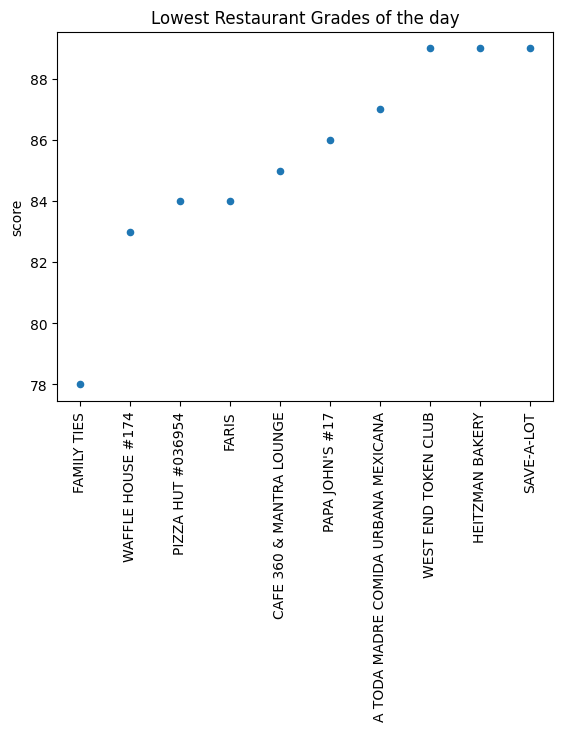

In [46]:
df = df[0:10]
df.plot.scatter( title = "Lowest Restaurant Grades of the day",x = 'EstablishmentName', y = 'score', rot = 'vertical', xlabel = "",);